<a href="https://colab.research.google.com/github/lucascatunda/Imersao_dados_4_2022_Alura/blob/main/Imers%C3%A3o_Dados_4_Pesquisa_de_Im%C3%B3veis_em_S%C3%A3o_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 01**


Primeiramente, vamos importar o banco de dados para o nosso notebook. Para isso, primeiramente, importamos os banco de dados e chamados o conteúdo presente no github.

In [1]:
import pandas as pd
dados = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(dados)

Para checar se os dados estão devidamente estruturados, chamamos a função head() para avaliar a estrutura dos 5 primeiros valores da tabela.

In [2]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Uma outra forma de avaliar o banco de dados seria de selecionar aleatoriamente um valor chamando a função .sample()

In [3]:
df.sample()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3196,Rua Lotário Lutz,Chácara Monte Alegre,São Paulo,920,6,10,12,R$ 10.000.000


Agora, com o banco de dados estruturado, vamos definir o tipo de valor presente em cada coluna (float64, object, string...). Para isso chamamos a função .info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Por exemplo, podemos somar o número de casas que apresentam o bairro "Vila Mariana"

In [7]:
sum((df["Bairro"] == "Vila Mariana"))

184

Podemos montar um conjunto de dados que apresenta apenas casas que estão no bairro Vila Mariana. Utilizamos um tipo de filtro query para fazer esta operação.

In [43]:
vila_mariana = "Vila Mariana"
imoveis_vila_mariana = df.query("Bairro == @vila_mariana")
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


Uma segunda forma de selecionar as casas do bairro vila mariana seria aplicar o segundo método de filtragem, porém vale destacar que por este método, é necessário reestruturar a tabela utilizando a função DataFrame.

In [46]:
imoveis_vila_mariana2 = df[df["Bairro"] == "Vila Mariana"]
imoveis_vila_mariana2 = pd.DataFrame(data=imoveis_vila_mariana2)
imoveis_vila_mariana2

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


Aplicando a função describe(), podemos estimar alguns valores, por estatística descritiva, das casas de Vila Mariana

In [52]:
imoveis_vila_mariana.describe()

,Metragem,Quartos,Banheiros,Vagas
count,184.000000,184.000000,184.000000,184.000000
mean,233.619565,3.375000,3.228261,2.929348
std,91.467315,0.983817,1.310765,1.801762
min,60.000000,1.000000,1.000000,1.000000
25%,166.000000,3.000000,2.000000,2.000000
50%,235.500000,3.000000,3.000000,2.000000
75%,285.000000,4.000000,4.000000,4.000000
max,650.000000,11.000000,8.000000,10.000000


Podemos também estimar o número de imóveis catalogados por bairro na cidade de são paulo, definimos uma variável n_imoveis_bairro e filtramos a categoria pela definição de bairro. Utilizando head(), podemos limitar os 20 primeiros bairros com maior numero de casas catalogadas.

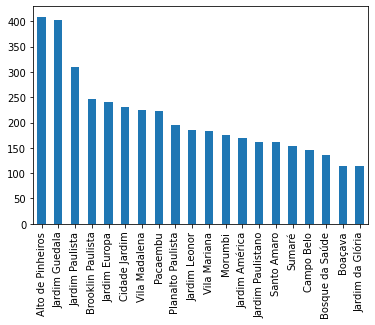

In [12]:
n_imoveis_bairro = df["Bairro"].value_counts()
n_imoveis_bairro.head(20).plot.bar()

Desafios


1 - Realizar a média da metragem para cada um dos bairros (Paulo)

2 - 2 Formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)

3 - Explorar alguns gráficos na documentação e aplicar na demais colunas do DF e tentar colocar alguma conclusão

4 - Pegar outras estatísticas dos dados, média, mediana, min, max.

5 - Descobrir quais são os bairros que não tem nome de rua.**bold text**

# 1 - Realizar a média da metragem para cada um dos bairros (Paulo)

Primeiramente, agrupamos os bairros chamando a função groupby

In [13]:
media_metragem_bairro = df.groupby('Bairro').describe().round(2) #Agrupa os dados e nos trás informação de metragem por bairro.
media_metragem_bairro = pd.DataFrame(data=media_metragem_bairro['Metragem'])# Converte o grupo Metragem


In [29]:
media_metragem_bairro.columns = ['count', 'mean', 'std', 'min', '25', '50', '75', 'max']
media_metragem_bairro.sort_values(by='count')

,count,mean,std,min,25,50,75,max
Bairro,,,,,,,,
Jardim Santa Cruz (Campo Grande),1.0,120.00,NaN,120.0,120.0,120.0,120.0,120.0
Jardim Parque Morumbi,1.0,100.00,NaN,100.0,100.0,100.0,100.0,100.0
Jardim Penha,1.0,133.00,NaN,133.0,133.0,133.0,133.0,133.0
Jardim Petropolis,1.0,700.00,NaN,700.0,700.0,700.0,700.0,700.0
Jardim Pirituba,1.0,63.00,NaN,63.0,63.0,63.0,63.0,63.0
...,...,...,...,...,...,...,...,...
Jardim Europa,240.0,561.57,263.57,120.0,340.0,552.5,705.0,1510.0
Brooklin Paulista,247.0,323.68,158.54,70.0,205.0,286.0,406.0,874.0
Jardim Paulista,309.0,486.30,242.64,110.0,320.0,450.0,600.0,1205.0


In [15]:
media_metragem_bairro['mean'].sort_values()

Bairro
Vila Guaca                               10.00
Vila Leonor                              46.00
Jardim Benfica                           48.00
Jardim Nova Germania                     57.00
Cidade Antônio Estevão de Carvalho       57.50
                                        ...   
Chácara Flora                          1260.73
Jardim das Camélias                    1700.00
Jardim Guedala                         2486.64
Vila Castelo                           2850.00
Sítio Represa                         37000.00
Name: mean, Length: 701, dtype: float64

In [16]:
media_metragem_bairro2 = df.groupby("Bairro")
media_metragem_bairro2 = pd.DataFrame(data=media_metragem_bairro2["Metragem"].describe().round(2)).sort_values(by='count', ascending=False)


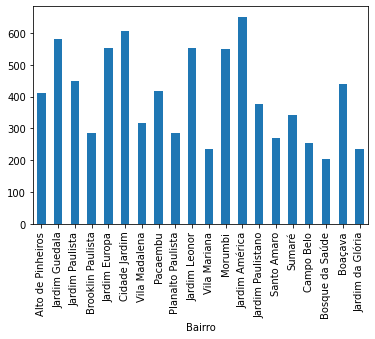

In [17]:
media_metragem_bairro2["50%"].head(20).plot.bar()

## 2 - 2 Formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)

## 4 - Pegar outras estatísticas dos dados, média, mediana, min, max.

In [18]:
planalto_paulista = df.query("Bairro == 'Planalto Paulista'")
planalto_paulista

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,R$ 2.190.000
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,R$ 1.390.000
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,R$ 670.000
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,R$ 2.014.000
...,...,...,...,...,...,...,...,...
9878,NaN,Planalto Paulista,São Paulo,200,3,3,3,R$ 680.000
9883,Alameda dos Tupinas,Planalto Paulista,São Paulo,405,4,6,4,R$ 1.550.000
9930,Avenida Odila,Planalto Paulista,São Paulo,262,3,6,4,R$ 1.500.000
9966,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000


In [19]:
bairro_planalto_paulista = df.loc[df['Bairro'] == 'Planalto Paulista']
bairro_planalto_paulista.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,R$ 2.190.000
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,R$ 1.390.000
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,R$ 670.000
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,R$ 2.014.000


4 - Pegar outras estatísticas dos dados, média, mediana, min, max.

In [20]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [21]:
df_group = df.groupby('Bairro')
df_group = pd.DataFrame(data=df_group["Metragem"].describe().round(2)).sort_values(by='count', ascending=False)

In [22]:
df_group.head(20)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Alto de Pinheiros,409.0,433.44,145.68,100.0,344.00,412.0,505.00,1530.0
Jardim Guedala,403.0,2486.64,37329.49,250.0,479.00,580.0,750.00,750000.0
Jardim Paulista,309.0,486.30,242.64,110.0,320.00,450.0,600.00,1205.0
Brooklin Paulista,247.0,323.68,158.54,70.0,205.00,286.0,406.00,874.0
Jardim Europa,240.0,561.57,263.57,120.0,340.00,552.5,705.00,1510.0
Cidade Jardim,230.0,697.33,312.94,260.0,480.00,605.0,840.75,1920.0
Vila Madalena,224.0,334.67,134.71,35.0,243.75,317.5,400.25,805.0
Pacaembu,222.0,512.81,339.63,130.0,326.25,417.0,518.25,2505.0
Planalto Paulista,195.0,324.35,177.02,80.0,217.50,285.0,382.50,1300.0


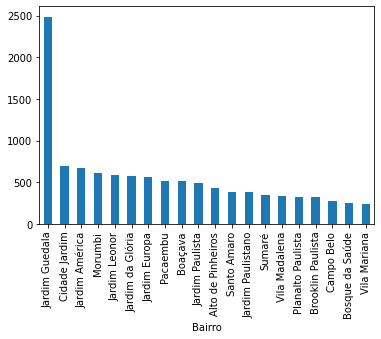

In [28]:
df_group['mean'].head(20).sort_values(ascending=False).plot.bar()

5 - Descobrir quais são os bairros que não tem nome de rua.**bold text**

In [24]:
bairro_semnome = df.groupby('Bairro')
bairro_semnome = pd.DataFrame(data=bairro_semnome['Bairro'].count().value_counts(ascending=False))
bairro_semnome

,Bairro
1,184
2,116
3,63
4,57
5,33
...,...
98,1
48,1
59,1
309,1
